#### below is the AUPRC

In [1]:
import numpy as np
from sklearn.metrics import average_precision_score

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
average_precision_score(y_true, y_scores)

0.8333333333333333

#### a simple neural network using Pytorch and AUPRC

Epoch [250/3500], Loss: 0.6853
Epoch [500/3500], Loss: 0.6725
Epoch [750/3500], Loss: 0.6615
Epoch [1000/3500], Loss: 0.6564
Epoch [1250/3500], Loss: 0.6522
Epoch [1500/3500], Loss: 0.6471
Epoch [1750/3500], Loss: 0.6418
Epoch [2000/3500], Loss: 0.6384
Epoch [2250/3500], Loss: 0.6370
Epoch [2500/3500], Loss: 0.6367
Epoch [2750/3500], Loss: 0.6367
Epoch [3000/3500], Loss: 0.6366
Epoch [3250/3500], Loss: 0.6366
Epoch [3500/3500], Loss: 0.6366


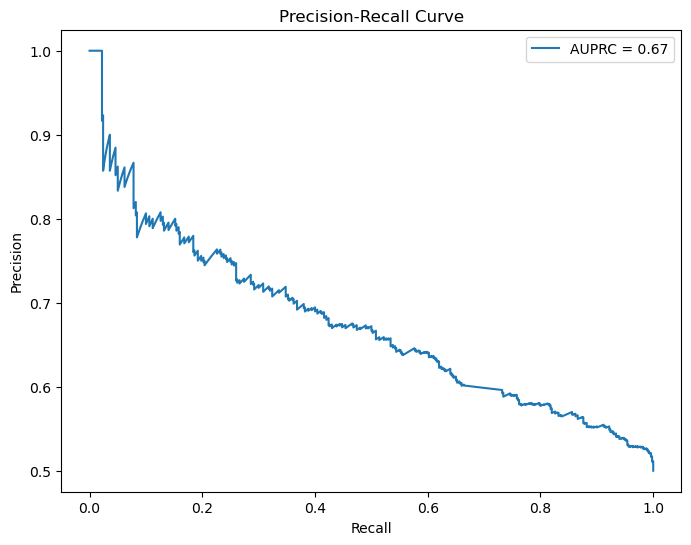

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Hyperparameters
input_size = 10  # Change this to match your input feature size
hidden_size = 5
output_size = 1
learning_rate = 0.001
num_epochs = 3500

# Create the neural network
model = SimpleNN(input_size, hidden_size, output_size)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Dummy data (replace with your actual data), input size is size of each data 
X_train = torch.randn(1000, input_size)
y_train = torch.randint(0, 2, (1000, 1)).float()

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 250 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_scores = model(X_train).numpy()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_scores)
auprc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [8]:
import torch

y_train = torch.randint(0, 2, (1000, 1)).float()
print(y_train)

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
      

#### average_precision_score and AUC

In [18]:
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, auc

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds= precision_recall_curve(y_true, y_scores)
print("This is the precision:", precision)
print("This is the recall:", recall)
print("This is the threshold:", thresholds)
auc=auc(recall, precision)
print("-----------------")
print(auc)



This is the precision: [0.5        0.66666667 0.5        1.         1.        ]
This is the recall: [1.  1.  0.5 0.5 0. ]
This is the threshold: [0.1  0.35 0.4  0.8 ]
-----------------
0.7916666666666666
